In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Micro_Credit_Data_File.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.shape

(209593, 37)

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

# Summary Statistics

In [7]:
df.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Observations:-
    
1. The mean is more  than median for Unnamed: 0 column.
2. There is large difference between 75% and max in almost all columns.

# Exploring Target Variable

In [8]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

# Data Visualizations

To check missing values

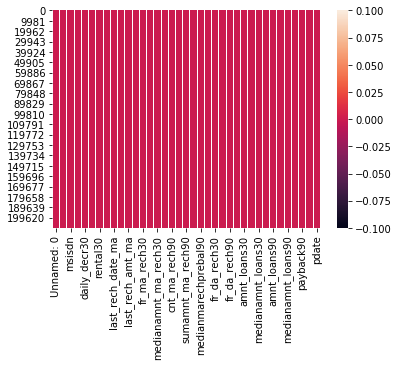

In [9]:
sns.heatmap(df.isnull())

Observations:-
    
    1. There is no missing values in the dataset.

# Univariate Analysis

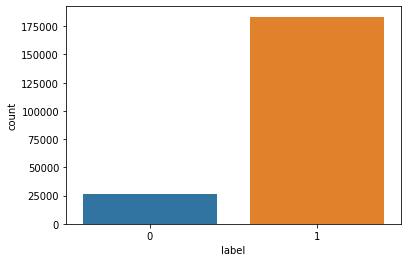

In [10]:
sns.countplot(x='label',data=df)

Observations:-
    
1. Class 1 (non-defaulters) is present comparatively more in the dataset than class 0 (defaulters).

In [11]:
#msisdn & pdate

# To check correlation

In [12]:
dfcor=df.corr()
dfcor

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


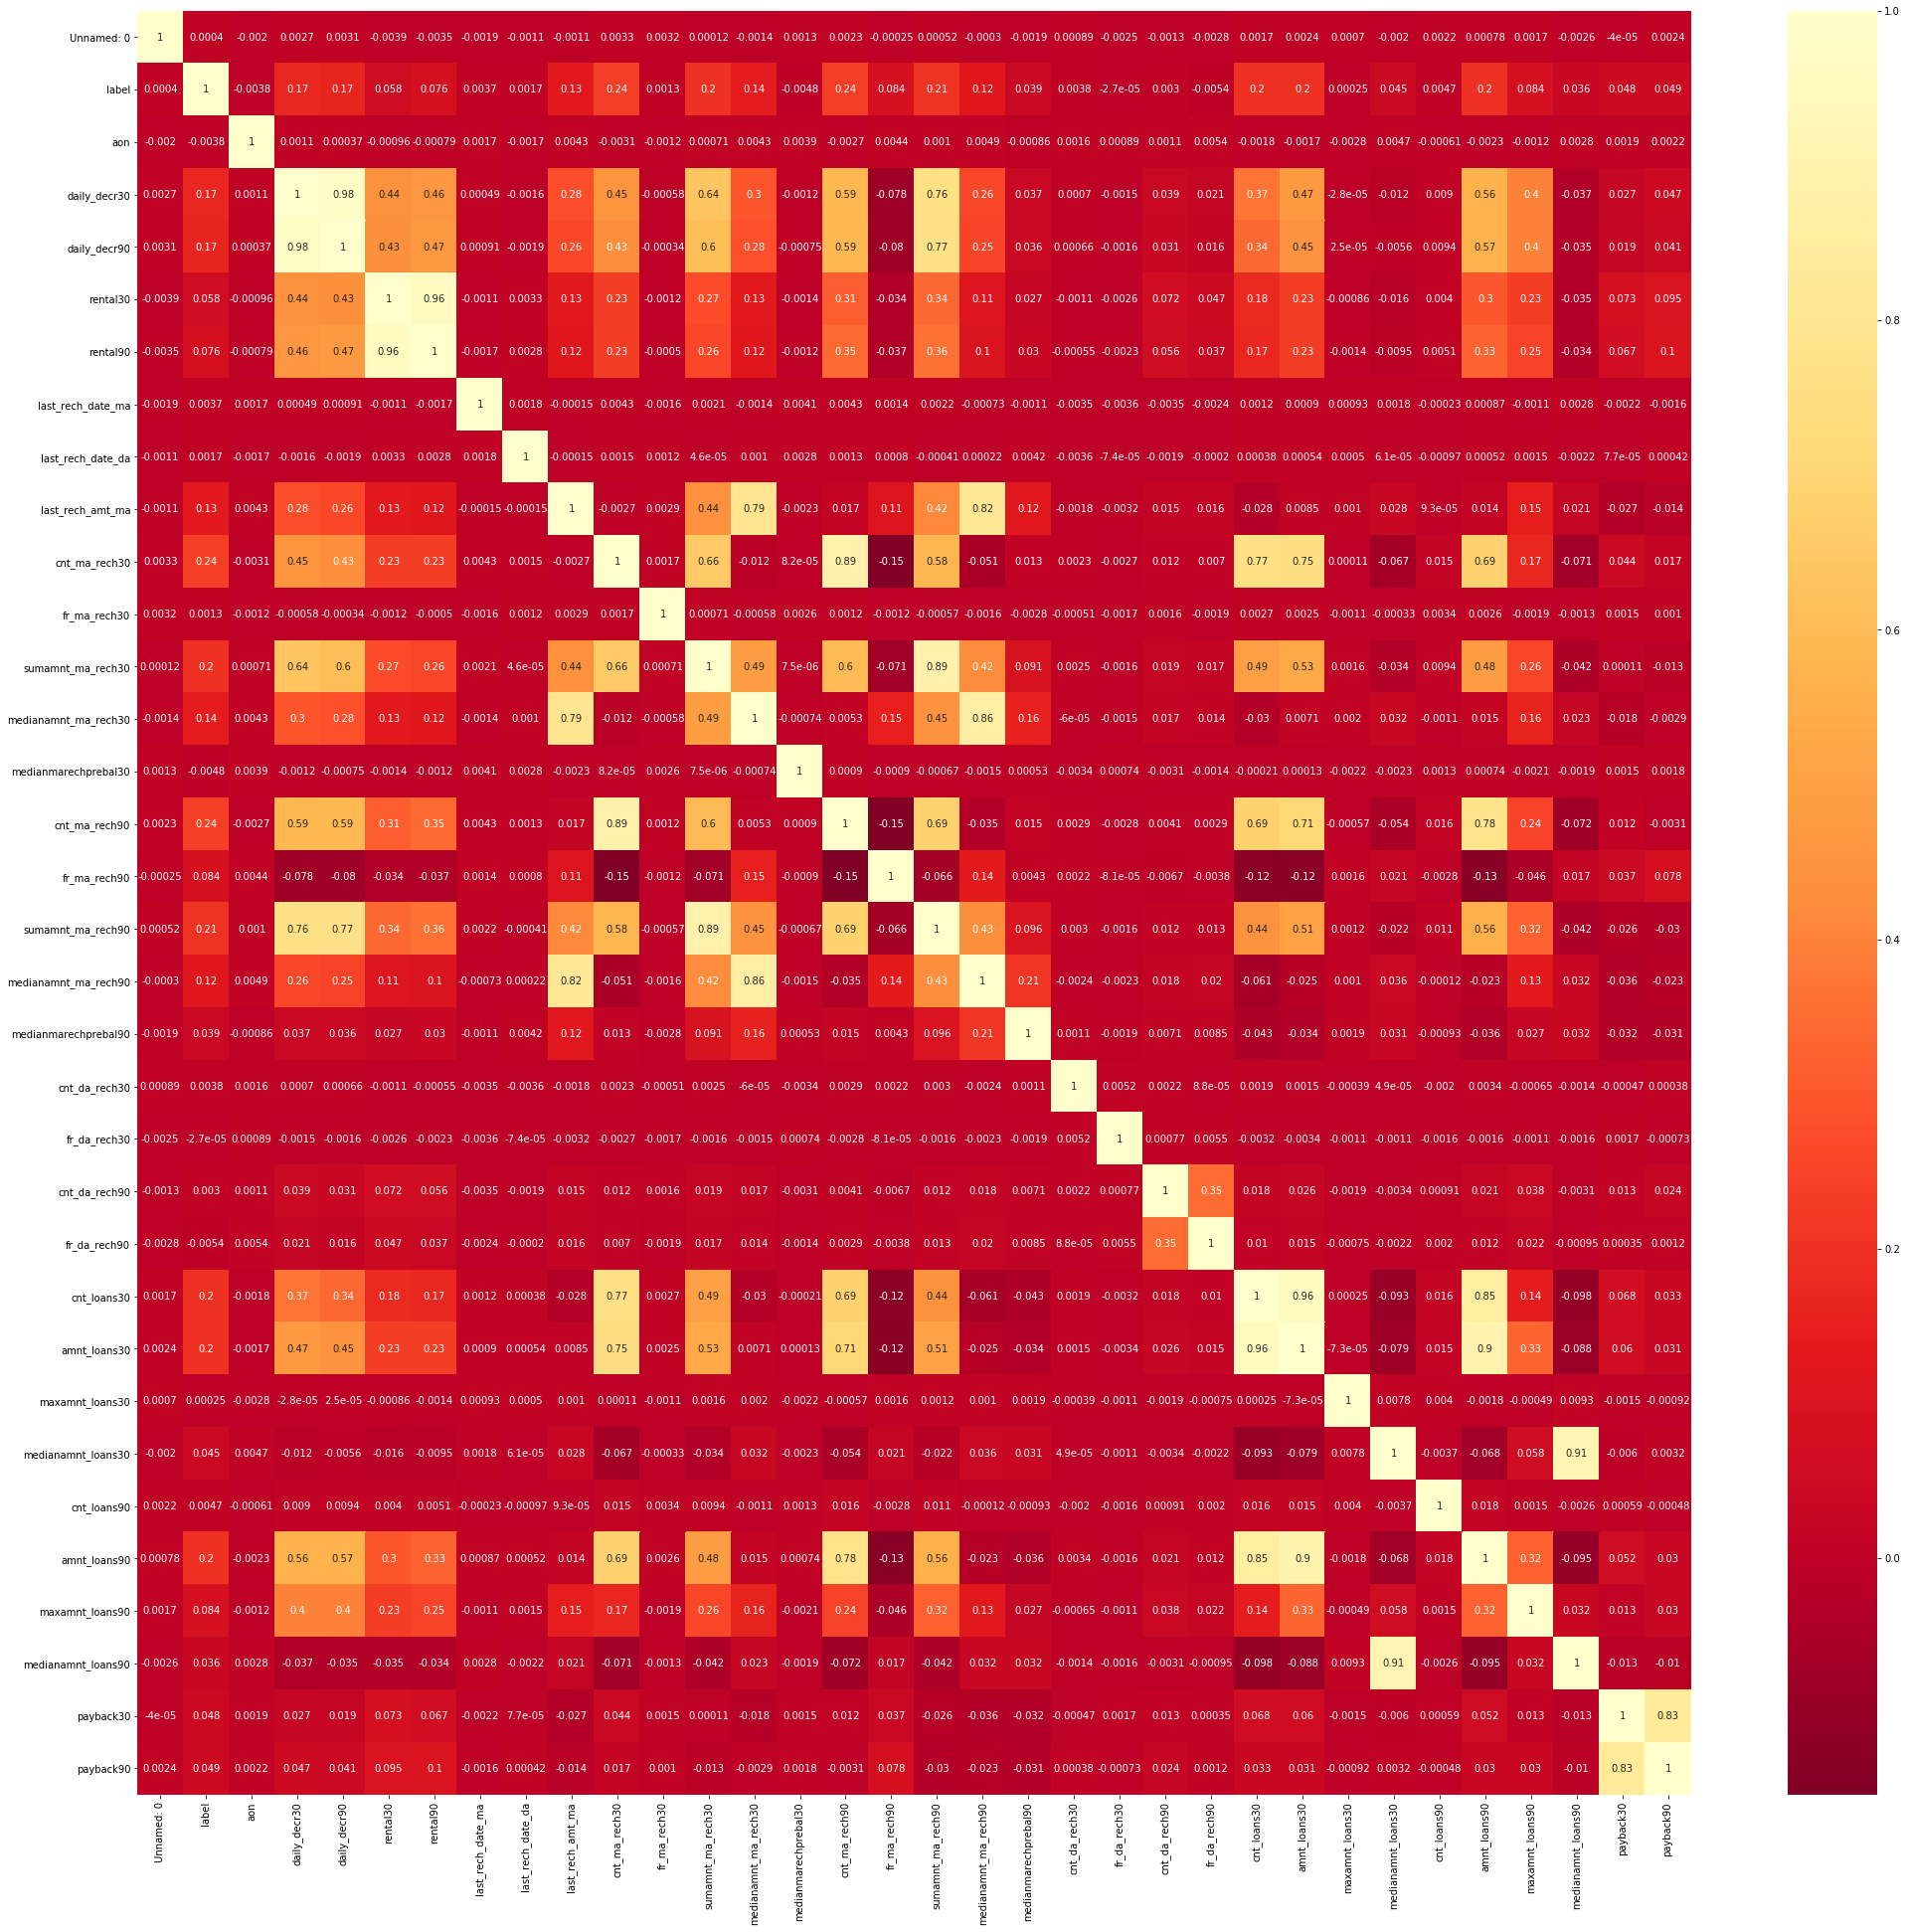

In [13]:
# Multivariate Analysis
plt.figure(figsize=(35,33))
sns.heatmap(dfcor,cmap='YlOrRd_r',annot=True)

Observations:-
    
1. label is highly positively correlated with cnt_ma_rech30.
2. cnt_ma_rech30 is highly negatively correlated with fr_ma_rech90.
3. fr_ma_rech90 is highly positively correlated with medianamnt_ma_rech30.
4. fr_ma_rech90 is highly negatively correlated with label.

# Bivariate Analysis

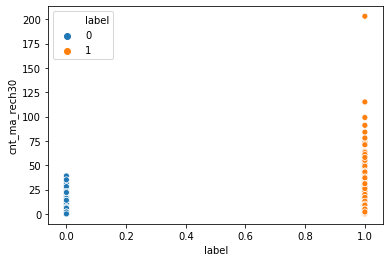

In [14]:
sns.scatterplot(x='label',y='cnt_ma_rech30',data=df,hue='label')

Observations:-
    
1. Non - defaulters accounts have charged more than defaulters in last 30 days .

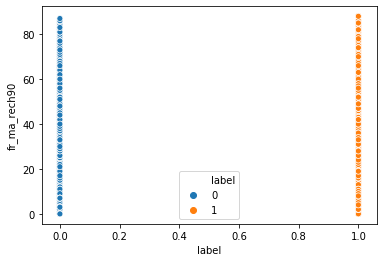

In [15]:
sns.scatterplot(x='label',y='fr_ma_rech90',data=df,hue='label')

Observations:-
    
1. Main accounts of defaulters and non-defaulters have charged equal number of times in last 90 days.


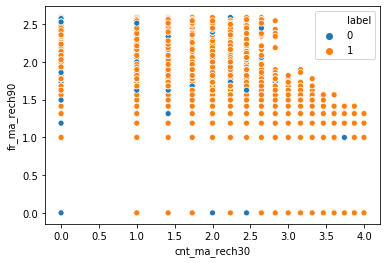

In [103]:
sns.scatterplot(x='cnt_ma_rech30',y='fr_ma_rech90',data=df,hue='label')

Observations:-
    
1. Main account of Non defaulters have charged more than defaulters account in last 90 days.
2. Frequency of charging of main account of non defaulters starts decreasing after 3 times of charging.

# Plotting Outliers

In [16]:
df.drop('msisdn',axis=1,inplace=True)

In [17]:
df.shape

(209593, 36)

Unnamed: 0                 AxesSubplot(0.125,0.808774;0.168478x0.0712264)
label                   AxesSubplot(0.327174,0.808774;0.168478x0.0712264)
aon                     AxesSubplot(0.529348,0.808774;0.168478x0.0712264)
daily_decr30            AxesSubplot(0.731522,0.808774;0.168478x0.0712264)
daily_decr90               AxesSubplot(0.125,0.723302;0.168478x0.0712264)
rental30                AxesSubplot(0.327174,0.723302;0.168478x0.0712264)
rental90                AxesSubplot(0.529348,0.723302;0.168478x0.0712264)
last_rech_date_ma       AxesSubplot(0.731522,0.723302;0.168478x0.0712264)
last_rech_date_da           AxesSubplot(0.125,0.63783;0.168478x0.0712264)
last_rech_amt_ma         AxesSubplot(0.327174,0.63783;0.168478x0.0712264)
cnt_ma_rech30            AxesSubplot(0.529348,0.63783;0.168478x0.0712264)
fr_ma_rech30             AxesSubplot(0.731522,0.63783;0.168478x0.0712264)
sumamnt_ma_rech30          AxesSubplot(0.125,0.552358;0.168478x0.0712264)
medianamnt_ma_rech30    AxesSubplot(0.

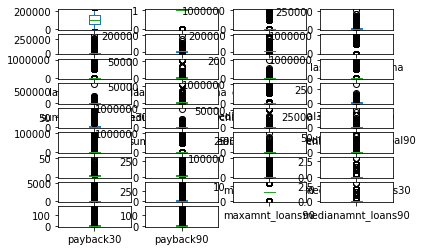

In [18]:
df.plot(kind='box',subplots=True,layout=(9,4))

Observations :-
    
1. Outliers are present in all columns except Unnamed:0.

# Label Encoding

In [19]:
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [20]:
df.drop(['pcircle','pdate'],axis=1,inplace=True)

# Removing Outliers

In [21]:
df.head()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [22]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.73204254, 2.64789583, 0.10357685, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [1.73202602, 0.37765836, 0.09776412, ..., 0.22959366, 0.38562959,
        0.41923266],
       [1.73200949, 0.37765836, 0.10010243, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [1.73200949, 0.37765836, 0.09378769, ..., 0.22959366, 0.06820893,
        0.04735622],
       [1.73202602, 0.37765836, 0.08428915, ..., 0.22959366, 0.38562959,
        0.59938541],
       [1.73204254, 0.37765836, 0.08628398, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [23]:
threshold=3
df_new=df[(z<3).all(axis=1)]

In [24]:
df_new.shape

(161465, 34)

In [25]:
df.head()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [26]:
df.shape

(209593, 34)

In [27]:
#48,128 rows are removed as outliers

In [28]:
df=df_new

# To check skewness

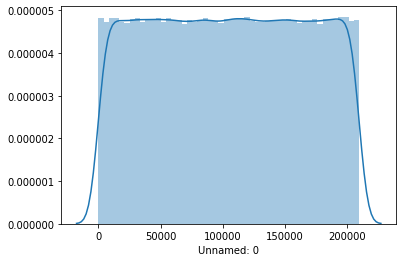

In [29]:
sns.distplot(df['Unnamed: 0'])

Observations:-
    
1. Unnamed: 0 is not skewed

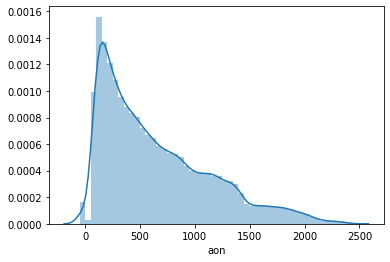

In [30]:
sns.distplot(df['aon'])

Observations:-
    
1. aon is right skewed

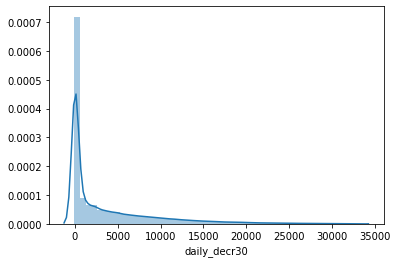

In [31]:
sns.distplot(df['daily_decr30'])

Observations:-
    
1. daily_decr30 is right skewed

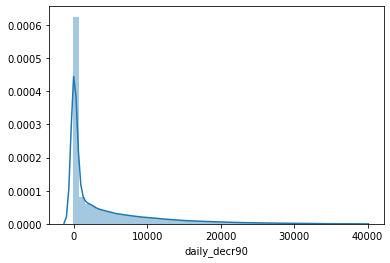

In [32]:
sns.distplot(df['daily_decr90'])

Observations:-
    
1. daily_decr90 is right skewed

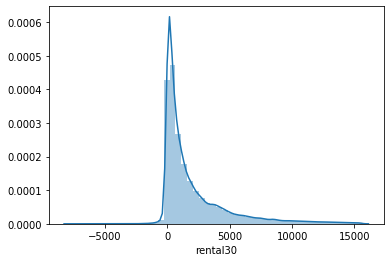

In [33]:
sns.distplot(df['rental30'])

Observations:-
    
1. rental30 is right skewed

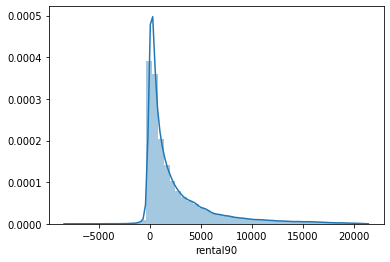

In [34]:
sns.distplot(df['rental90'])

Observations:-
    
1. rental90 is right skewed

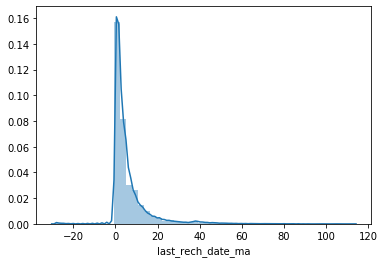

In [35]:
sns.distplot(df['last_rech_date_ma'])

Observations:-
    
1. last_rech_date_ma is right skewed

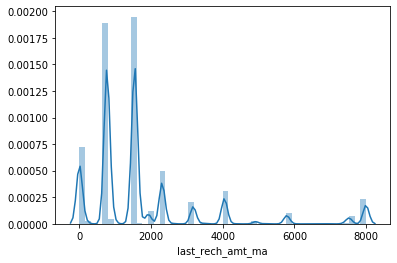

In [36]:
sns.distplot(df['last_rech_amt_ma'])

Observations:-
    
1. last_rech_amt_ma is right skewed

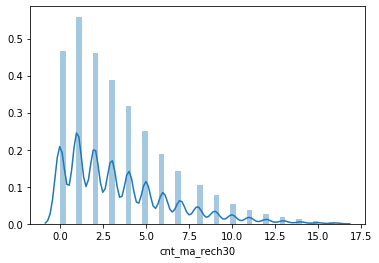

In [37]:
sns.distplot(df['cnt_ma_rech30'])

Observations:-
    
1. cnt_ma_rech30 is right skewed

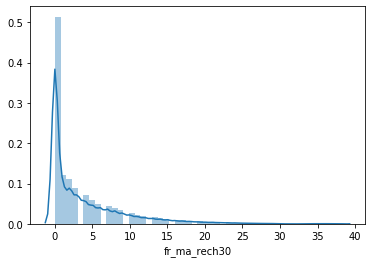

In [38]:
sns.distplot(df['fr_ma_rech30'])

Observations:-
    
1.fr_ma_rech30 is right skewed

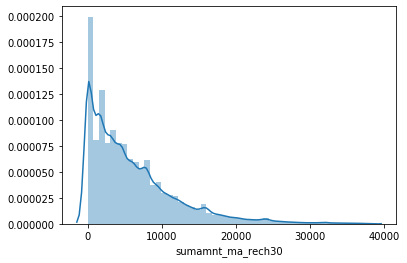

In [39]:
sns.distplot(df['sumamnt_ma_rech30'])

Observations:-
    
1. sumamnt_ma_rech30 is right skewed

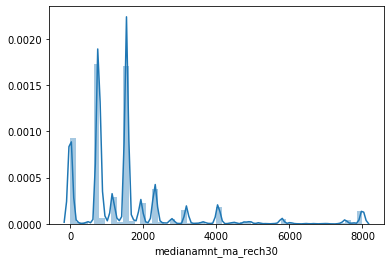

In [40]:
sns.distplot(df['medianamnt_ma_rech30'])

Observations:-
    
1. medianamnt_ma_rech30 is right skewed

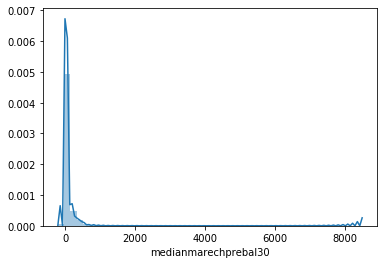

In [41]:
sns.distplot(df['medianmarechprebal30'])

Observations:-
    
1. medianmarechprebal30 is right skewed

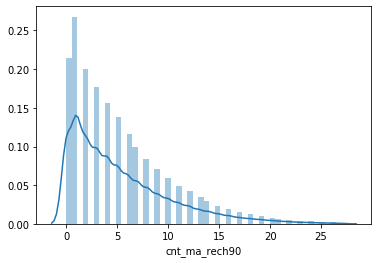

In [42]:
sns.distplot(df['cnt_ma_rech90'])

Observations:-
    
1. cnt_ma_rech90 is right skewed

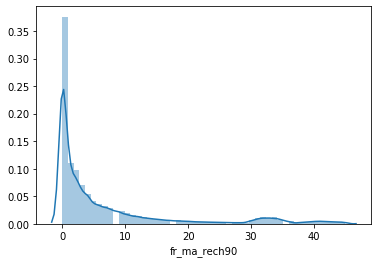

In [43]:
sns.distplot(df['fr_ma_rech90'])

Observations:-
    
1. fr_ma_rech90 is right skewed

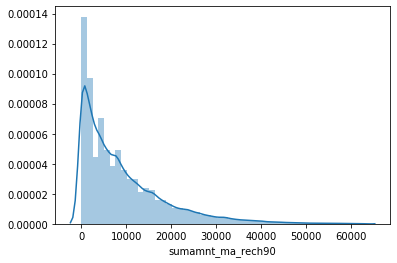

In [44]:
sns.distplot(df['sumamnt_ma_rech90'])

Observations:-
    
1. sumamnt_ma_rech90 is right skewed

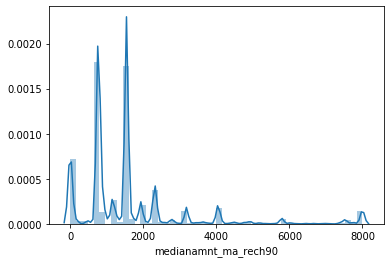

In [45]:
sns.distplot(df['medianamnt_ma_rech90'])

Observations:-
    
1. medianamnt_ma_rech90 is right skewed

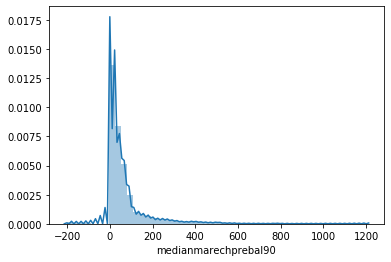

In [46]:
sns.distplot(df['medianmarechprebal90'])

Observations:-
    
1. medianmarechprebal90 is right skewed

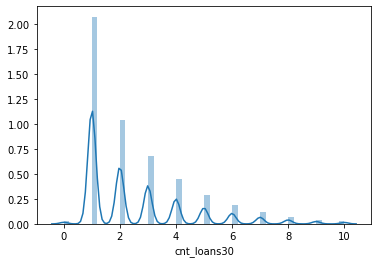

In [47]:
sns.distplot(df['cnt_loans30'])

Observations:-
    
1. cnt_loans30 is right skewed

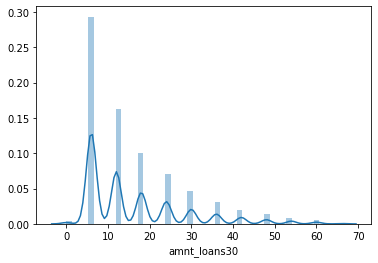

In [48]:
sns.distplot(df['amnt_loans30'])

Observations:-
    
1. amnt_loans30 is right skewed

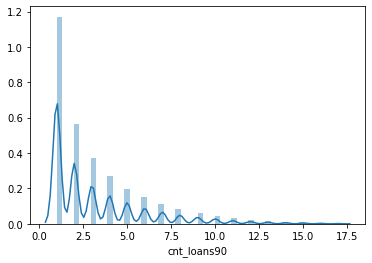

In [49]:
sns.distplot(df['cnt_loans90'])

Observations:-
    
1. cnt_loans90 is right skewed

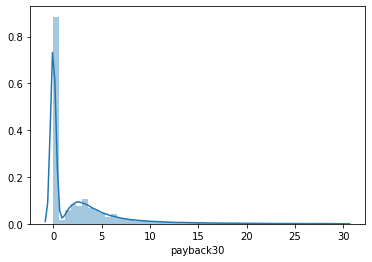

In [50]:
sns.distplot(df['payback30'])

Observations:-
    
1. payback30 is right skewed

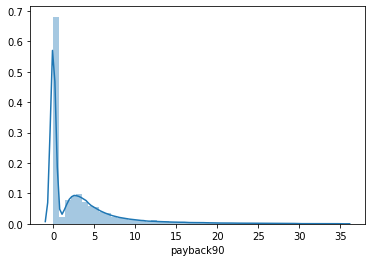

In [51]:
sns.distplot(df['payback90'])

Observations:-
    
1. payback90 is right skewed

In [52]:
df.columns

Index(['Unnamed: 0', 'label', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90'],
      dtype='object')

In [53]:
df.skew()

Unnamed: 0               0.000323
label                   -2.090315
aon                      0.957902
daily_decr30             1.963747
daily_decr90             2.077637
rental30                 2.194889
rental90                 2.244866
last_rech_date_ma        3.099484
last_rech_date_da       10.384887
last_rech_amt_ma         2.125356
cnt_ma_rech30            1.175157
fr_ma_rech30             2.005139
sumamnt_ma_rech30        1.634226
medianamnt_ma_rech30     2.326312
medianmarechprebal30    10.538891
cnt_ma_rech90            1.321145
fr_ma_rech90             1.985567
sumamnt_ma_rech90        1.707309
medianamnt_ma_rech90     2.373140
medianmarechprebal90     3.692650
cnt_da_rech30           50.760988
fr_da_rech30             0.000000
cnt_da_rech90            6.934340
fr_da_rech90             0.000000
cnt_loans30              1.465414
amnt_loans30             1.441450
maxamnt_loans30         53.470571
medianamnt_loans30       5.355423
cnt_loans90              1.708977
amnt_loans90  

In [54]:
df.columns

Index(['Unnamed: 0', 'label', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90'],
      dtype='object')

All the columns are highly skewed except pcircle. 

In [55]:
list=['Unnamed: 0',  
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90',  'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']
for val in list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])


In [56]:
df.skew()

Unnamed: 0               0.000323
label                   -2.090315
aon                      0.957902
daily_decr30             1.963747
daily_decr90             2.077637
rental30                 2.194889
rental90                 2.244866
last_rech_date_ma        3.099484
last_rech_date_da       10.384887
last_rech_amt_ma         0.400265
cnt_ma_rech30           -0.111020
fr_ma_rech30             0.601145
sumamnt_ma_rech30        0.169570
medianamnt_ma_rech30     0.251023
medianmarechprebal30    10.538891
cnt_ma_rech90            0.076171
fr_ma_rech90             0.909459
sumamnt_ma_rech90        0.314699
medianamnt_ma_rech90     0.345523
medianmarechprebal90     3.692650
cnt_da_rech30           48.410201
fr_da_rech30             0.000000
cnt_da_rech90            6.934340
fr_da_rech90             0.000000
cnt_loans30              0.778416
amnt_loans30             0.753693
maxamnt_loans30         48.094763
medianamnt_loans30       5.355423
cnt_loans90              0.972697
amnt_loans90  

In [57]:
df.isnull().sum()

Unnamed: 0              0
label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [58]:
list=['Unnamed: 0',  
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90',  'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']
for val in list:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])


In [59]:
df.skew()

Unnamed: 0               0.000323
label                   -2.090315
aon                      0.957902
daily_decr30             1.963747
daily_decr90             2.077637
rental30                 2.194889
rental90                 2.244866
last_rech_date_ma        3.099484
last_rech_date_da       10.384887
last_rech_amt_ma         0.400265
cnt_ma_rech30           -0.111020
fr_ma_rech30            -0.099173
sumamnt_ma_rech30        0.169570
medianamnt_ma_rech30     0.251023
medianmarechprebal30    10.538891
cnt_ma_rech90            0.076171
fr_ma_rech90            -0.048324
sumamnt_ma_rech90        0.314699
medianamnt_ma_rech90     0.345523
medianmarechprebal90     3.692650
cnt_da_rech30           36.016258
fr_da_rech30             0.000000
cnt_da_rech90            6.934340
fr_da_rech90             0.000000
cnt_loans30             -0.209941
amnt_loans30            -0.200971
maxamnt_loans30         18.958579
medianamnt_loans30       5.355423
cnt_loans90              0.668404
amnt_loans90  

In [60]:
df.isnull().sum()

Unnamed: 0              0
label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

# Model Training

In [61]:
x=df[['Unnamed: 0',  'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']]

x.head()
x.shape
y=df['label']

y.unique()

array([0, 1], dtype=int64)

In [62]:
x.shape

(161465, 33)

# Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [64]:
x=pd.DataFrame(x)

In [65]:
x.columns=['Unnamed: 0',  'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90']

In [66]:
x.head()

,Unnamed: 0,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,-1.730966,-0.753989,-0.126467,-0.169679,-0.644046,-0.635286,-0.411410,-0.119438,0.115871,-0.204434,...,-0.040659,-0.101972,-0.106934,-0.180636,-0.274771,-0.317444,-0.331915,-0.159769,2.170610,1.996910
1,-1.730949,0.132221,1.475220,1.235024,0.622504,0.338713,1.463090,-0.119438,1.930137,-0.648448,...,-0.868209,-0.101972,1.228686,-0.180636,-1.006849,-0.317444,3.012819,-0.159769,-0.917767,-1.004724
2,-1.730933,-0.224277,-0.419187,-0.428173,-0.395927,-0.453609,-0.307271,-0.119438,0.115871,-0.648448,...,-0.868209,-0.906317,-0.106934,-0.180636,-1.006849,-1.034549,-0.331915,-0.159769,-0.917767,-1.004724
3,-1.730916,-0.816426,-0.662396,-0.641644,-0.666198,-0.663875,3.650007,-0.119438,-0.300573,-1.720391,...,-0.040659,-0.101972,-0.106934,-0.180636,-0.274771,-0.317444,-0.331915,-0.159769,-0.917767,-1.004724
4,-1.730900,0.605537,-0.639539,-0.621581,-0.323399,-0.397184,-0.203132,-0.119438,0.550302,1.115705,...,1.872299,1.757344,-0.106934,-0.180636,1.417495,1.340209,-0.331915,-0.159769,0.727078,0.593922


In [67]:
df.isnull().sum()

Unnamed: 0              0
label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [68]:
df.dtypes

Unnamed: 0                int64
label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma        float64
cnt_ma_rech30           float64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90           float64
fr_ma_rech90            float64
sumamnt_ma_rech90       float64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90           float64
fr_da_rech90              int64
cnt_loans30             float64
amnt_loans30            float64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90            float64
maxamnt_loans90         float64
medianam

In [69]:
y=df['label']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: label, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LogisticRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    print('Accuracy score of Logistic Regression','is:')
    accu_score=accuracy_score(y_test,pred)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    if accu_score>maxAccu:
        maxAccu=accu_score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

Accuracy score of Logistic Regression is:
0.8676913548968274
[[  797  4136]
 [  564 30026]]
              precision    recall  f1-score   support

           0       0.59      0.16      0.25      4933
           1       0.88      0.98      0.93     30590

    accuracy                           0.87     35523
   macro avg       0.73      0.57      0.59     35523
weighted avg       0.84      0.87      0.83     35523

Accuracy score of Logistic Regression is:
0.8715480111477071
[[  884  3946]
 [  617 30076]]
              precision    recall  f1-score   support

           0       0.59      0.18      0.28      4830
           1       0.88      0.98      0.93     30693

    accuracy                           0.87     35523
   macro avg       0.74      0.58      0.60     35523
weighted avg       0.84      0.87      0.84     35523

Accuracy score of Logistic Regression is:
0.8662838161191341
[[  784  4164]
 [  586 29989]]
              precision    recall  f1-score   support

           0   

Best accuracy is 0.8723643836387692 on Random_state 143

# Algorithms

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=143)
lm=LogisticRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
print('Accuracy score of Logistic Regression','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of Logistic Regression is:
0.8723643836387692
[[  839  3948]
 [  586 30150]]
              precision    recall  f1-score   support

           0       0.59      0.18      0.27      4787
           1       0.88      0.98      0.93     30736

    accuracy                           0.87     35523
   macro avg       0.74      0.58      0.60     35523
weighted avg       0.84      0.87      0.84     35523



Accuracy score of Logistic Regression is:0.8723643836387692

In [72]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('Accuracy score of DecisionTreeClassifier','is:')
accu_score=accuracy_score(y_test,preddtc)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

Accuracy score of DecisionTreeClassifier is:
0.8576133772485433
[[ 2444  2343]
 [ 2715 28021]]
              precision    recall  f1-score   support

           0       0.47      0.51      0.49      4787
           1       0.92      0.91      0.92     30736

    accuracy                           0.86     35523
   macro avg       0.70      0.71      0.70     35523
weighted avg       0.86      0.86      0.86     35523



Accuracy score of dtc is:0.8576133772485433

In [73]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print('Accuracy score of knn','is:')
accu_score=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score of knn is:
0.8723643836387692
[[  839  3948]
 [  586 30150]]
              precision    recall  f1-score   support

           0       0.59      0.18      0.27      4787
           1       0.88      0.98      0.93     30736

    accuracy                           0.87     35523
   macro avg       0.74      0.58      0.60     35523
weighted avg       0.84      0.87      0.84     35523



Accuracy score of knn is: 0.8723643836387692

In [75]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(x_train, y_train.ravel()) 
predsvm=clf.predict(x_test)
print('Accuracy score of svm','is:')
accu_score=accuracy_score(y_test,predsvm)
print(accuracy_score(y_test,predsvm))
print(confusion_matrix(y_test,predsvm))
print(classification_report(y_test,predsvm))

Accuracy score of svm is:
0.8695211553078287
[[  316  4471]
 [  164 30572]]
              precision    recall  f1-score   support

           0       0.66      0.07      0.12      4787
           1       0.87      0.99      0.93     30736

    accuracy                           0.87     35523
   macro avg       0.77      0.53      0.52     35523
weighted avg       0.84      0.87      0.82     35523



Accuracy score of svm is: 0.8695211553078287


In [76]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print('Accuracy score of GaussianNB','is:')
accu_score=accuracy_score(y_test,predgnb)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

Accuracy score of GaussianNB is:
0.7143259296793627
[[ 3873   914]
 [ 9234 21502]]
              precision    recall  f1-score   support

           0       0.30      0.81      0.43      4787
           1       0.96      0.70      0.81     30736

    accuracy                           0.71     35523
   macro avg       0.63      0.75      0.62     35523
weighted avg       0.87      0.71      0.76     35523



Accuracy score of gnb is: 0.7143259296793627


In [77]:
# Ensembler Techniques

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score of RandomForestClassifier','is:')
accu_score=accuracy_score(y_test,predrf)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score of RandomForestClassifier is:
0.9105931368409199
[[ 2289  2498]
 [  678 30058]]
              precision    recall  f1-score   support

           0       0.77      0.48      0.59      4787
           1       0.92      0.98      0.95     30736

    accuracy                           0.91     35523
   macro avg       0.85      0.73      0.77     35523
weighted avg       0.90      0.91      0.90     35523



Accuracy score of random forest is: 0.9105931368409199


In [78]:
from sklearn.ensemble import AdaBoostClassifier

ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy score of AdaBoostClassifier','is:')
accu_score=accuracy_score(y_test,predad)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

Accuracy score of AdaBoostClassifier is:
0.8991920727416041
[[ 1625  3162]
 [  419 30317]]
              precision    recall  f1-score   support

           0       0.80      0.34      0.48      4787
           1       0.91      0.99      0.94     30736

    accuracy                           0.90     35523
   macro avg       0.85      0.66      0.71     35523
weighted avg       0.89      0.90      0.88     35523



Accuracy score of adaboost  is: 0.8991920727416041


# Cross Validation Score

In [79]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.90632645 0.90713158 0.9084941  0.90874183 0.87873533]
0.9018858576162018 0.011609105317615186


Cross val score of rf is 0.9018858576162018

In [80]:
adscores=cross_val_score(ad,x,y,cv=5)
print(adscores)
print(adscores.mean(),adscores.std())

[0.89722231 0.89517852 0.89799647 0.89616945 0.15777413]
0.7488681757656457 0.295548557493674


Cross val score of ad is 0.7488681757656457

In [81]:
list1=[0.9105931368409199,0.8991920727416041]
list2=[0.9018858576162018,0.7488681757656457]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)


[0.008707279224718145, 0.15032389697595838]


# Random Forest is the best algorithm

# Hyper Parameter Tuning

In [82]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=143)
rf=RandomForestClassifier()
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy']}, scoring='accuracy')

In [83]:
gd_sr.best_params_

{'criterion': 'entropy'}

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=143)
rf=RandomForestClassifier()
grid_param={'max_features':['auto','sqrt','log2']}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [88]:
gd_sr.best_params_

{'max_features': 'log2'}

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=143)
rf=RandomForestClassifier()
grid_param={'n_estimators':[25,50,75,100]}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [25, 50, 75, 100]},
             scoring='accuracy')

In [90]:
gd_sr.best_params_

{'n_estimators': 100}

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=143)
rf=RandomForestClassifier()
grid_param={'max_depth':[None,int]}
gd_sr=GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, <class 'int'>]},
             scoring='accuracy')

In [92]:
gd_sr.best_params_

{'max_depth': None}

In [93]:
rf=RandomForestClassifier(n_estimators=100,max_depth=None,max_features='log2',criterion='entropy')
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy score of RandomForestClassifier','is:')
accu_score=accuracy_score(y_test,predrf)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy score of RandomForestClassifier is:
0.9105086845142584
[[ 2290  2497]
 [  682 30054]]
              precision    recall  f1-score   support

           0       0.77      0.48      0.59      4787
           1       0.92      0.98      0.95     30736

    accuracy                           0.91     35523
   macro avg       0.85      0.73      0.77     35523
weighted avg       0.90      0.91      0.90     35523



Accuracy score of RandomForestClassifier is: 0.9105086845142584


In [94]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [95]:
y_pred_prob=rf.predict_proba(x_test)[:,1]

In [96]:
y_pred_prob

array([0.99, 0.97, 0.97, ..., 0.99, 0.91, 0.9 ])

In [97]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [98]:
fpr

array([0.        , 0.00543138, 0.01545853, 0.02527679, 0.03593065,
       0.04783789, 0.06392313, 0.07833716, 0.0923334 , 0.10695634,
       0.12492166, 0.14163359, 0.15646543, 0.17025277, 0.17986213,
       0.19302277, 0.20618341, 0.21746396, 0.22937121, 0.23918947,
       0.25151452, 0.26592856, 0.2780447 , 0.2782536 , 0.28995195,
       0.30039691, 0.31167746, 0.32212241, 0.32233131, 0.33298517,
       0.34343012, 0.35324838, 0.36452893, 0.3716315 , 0.38019637,
       0.38897013, 0.39774389, 0.39795279, 0.39795279, 0.40651765,
       0.41341132, 0.41362022, 0.41362022, 0.42197619, 0.43095885,
       0.43095885, 0.43785252, 0.44599958, 0.44620848, 0.45268435,
       0.46062252, 0.46083142, 0.46918738, 0.47608105, 0.48422812,
       0.48443702, 0.49070399, 0.49091289, 0.49738876, 0.50490913,
       0.50511803, 0.51472739, 0.52141216, 0.52162106, 0.52162106,
       0.52767913, 0.52788803, 0.52830583, 0.52851473, 0.53645289,
       0.53645289, 0.54355546, 0.54397326, 0.54940464, 0.55567

In [99]:
tpr

array([0.        , 0.15769781, 0.2866671 , 0.38850208, 0.46977486,
       0.53526809, 0.5889836 , 0.63306871, 0.67168792, 0.70708615,
       0.7336999 , 0.75790604, 0.77960698, 0.79997397, 0.81640422,
       0.83078475, 0.84418922, 0.85495836, 0.86497918, 0.8743493 ,
       0.88245055, 0.88980349, 0.89764446, 0.89764446, 0.90363092,
       0.91056091, 0.91609188, 0.92061426, 0.92061426, 0.925462  ,
       0.93034227, 0.93424649, 0.9381507 , 0.94133915, 0.9446252 ,
       0.94758589, 0.95028631, 0.95028631, 0.95031884, 0.9525963 ,
       0.95451588, 0.95451588, 0.95454841, 0.95663066, 0.95913587,
       0.9591684 , 0.96105544, 0.96274727, 0.96274727, 0.96469938,
       0.96652134, 0.96652134, 0.96808303, 0.96974232, 0.97146668,
       0.97146668, 0.97289823, 0.97289823, 0.97436231, 0.97553358,
       0.97553358, 0.9765747 , 0.9777785 , 0.9777785 , 0.97781104,
       0.97881963, 0.97881963, 0.97881963, 0.97881963, 0.97989328,
       0.97992582, 0.98070666, 0.98070666, 0.98165018, 0.98239

In [100]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.90000000e-01, 9.80000000e-01,
       9.70000000e-01, 9.60000000e-01, 9.50000000e-01, 9.40000000e-01,
       9.30000000e-01, 9.20000000e-01, 9.10000000e-01, 9.00000000e-01,
       8.90000000e-01, 8.80000000e-01, 8.70000000e-01, 8.60000000e-01,
       8.50000000e-01, 8.40000000e-01, 8.30000000e-01, 8.20000000e-01,
       8.10000000e-01, 8.00000000e-01, 7.90000000e-01, 7.84000074e-01,
       7.80000000e-01, 7.70000000e-01, 7.60000000e-01, 7.50000000e-01,
       7.41706056e-01, 7.40000000e-01, 7.30000000e-01, 7.20000000e-01,
       7.10000000e-01, 7.00000000e-01, 6.90000000e-01, 6.80000000e-01,
       6.70000000e-01, 6.63116117e-01, 6.61706056e-01, 6.60000000e-01,
       6.50000000e-01, 6.42595443e-01, 6.41808181e-01, 6.40000000e-01,
       6.30000000e-01, 6.21706056e-01, 6.20000000e-01, 6.10000000e-01,
       6.02274726e-01, 6.00000000e-01, 5.90000000e-01, 5.81706056e-01,
       5.80000000e-01, 5.70000000e-01, 5.60000000e-01, 5.50889387e-01,
      

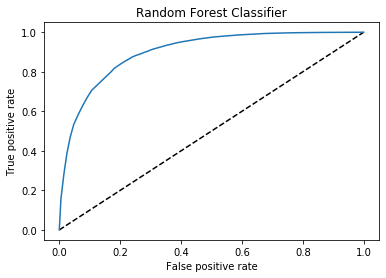

In [101]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

# Saving the model

In [102]:
import joblib
joblib.dump(rf,"rf_micro_credit_loan.obj")

['rf_micro_credit_loan.obj']